**Problem 0**

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/henryjiang/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


**Problem 1**

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbor methods is to find a predefined number of training samples closest to the point you want to predict in the feature space. The predicted label is some sort of average of the true labels of the nearest neighbors. The number of nearest neighbors is a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (distance-based neighbor learning). 

The challenge in this technique is the distance metric. How do you measure the distance between two points in the feature space? This is non-trivial question because usually different continuous features have different units and order of magnitudes, some features are one-hot-encoded, some features are ordinal. The key to successfully apply this method is usually to create a custom distance metric tailored to your dataset. However the standard Euclidean (geometric) distance is often used after the features are standard scaled.

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

**Problem 1a** (10 points)

Nearest neighbor regression. Read the manual of KNeighborsRegressor. Let's study how the `n_neighbors` parameter impact the prediction.

Please recreate the toy regression dataset from the lecture notes with n_samples = 30. Split the data into train and validation (70-30). Train models with n_neighbors = 1 to 10. Plot the train and validation scores using an evaluation metric of your choice as a function of n_neighbors.

Visualize the models by plotting the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!

Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting shows up in the models?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 

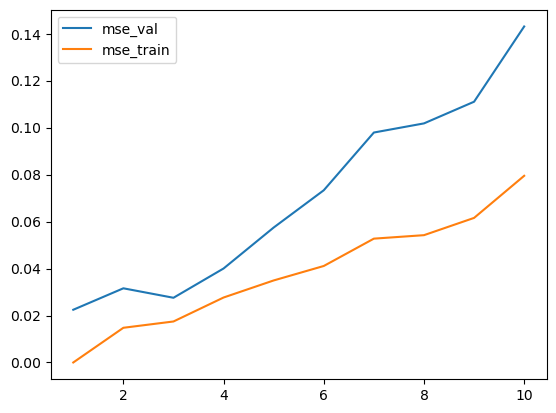

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

n_samples = 30
def true_fun(X):
    return np.cos(1.5 * np.pi * X)
X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_train,X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)
X_train=X_train.reshape(-1,1)
X_val=X_val.reshape(-1,1)

mse_ls=[]
mse_train_ls=[]
n_neighbors=range(1,11,1)
for n in n_neighbors:
    # set the hyperparameters
    neigh_mod = KNeighborsRegressor(n_neighbors=n)
    # fit the model
    neigh_mod.fit(X_train,y_train)
    y_pred_train=neigh_mod.predict(X_train) 
    mse_train=mean_squared_error(y_train, y_pred_train)
    mse_train_ls.append(mse_train)
    y_pred = neigh_mod.predict(X_val) 
    mse=mean_squared_error(y_val, y_pred) #gives you the mean squared error
    mse_ls.append(mse)
  
plt.plot(n_neighbors, mse_ls, label = "mse_val")
plt.plot(n_neighbors, mse_train_ls, label = "mse_train")
plt.legend()
plt.show()

Visualize the models by plotting the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!


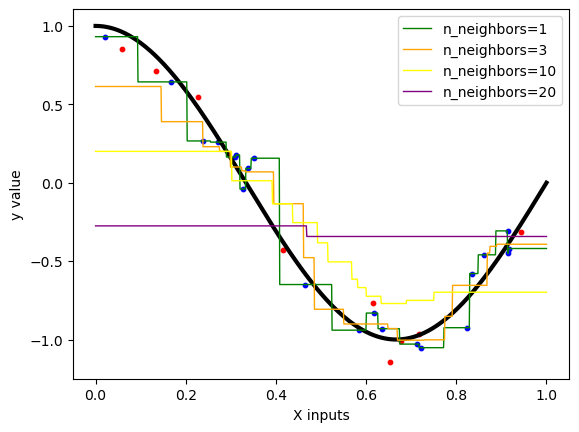

In [3]:
n_neighbors_e = [1,3,10,20]
x_inputs=np.linspace(0,1,1000)
true_y_ls=[]
data_pred=[]
for n in n_neighbors_e:
    # set the hyperparameters
    neigh_mod = KNeighborsRegressor(n_neighbors=n)
    # fit the model
    neigh_mod.fit(X_train,y_train)
    y_pred_ls=neigh_mod.predict(x_inputs.reshape(-1,1))
    data_pred.append(y_pred_ls)
    
#function to generate the true x values
for n in x_inputs:
    y=true_fun(n)
    true_y_ls.append(y)
    
    
plt.scatter(X_train, y_train, c ="blue",s=10, alpha=1)
plt.scatter(X_val, y_val, c ="red",s=10,alpha=1)
plt.xlabel('X inputs')
plt.ylabel('y value')
plt.plot(x_inputs, true_y_ls, color='black',
     linewidth=3, markersize=10)
df_pred=pd.DataFrame(data_pred)


predlist_n1=df_pred.iloc[0]
plt.plot(x_inputs, predlist_n1, color='green',
     linewidth=1, markersize=10, label='n_neighbors=1')
predlist_n3=df_pred.iloc[1]
plt.plot(x_inputs, predlist_n3, color='orange',
     linewidth=1, markersize=10, label='n_neighbors=3')
predlist_n10=df_pred.iloc[2]
plt.plot(x_inputs, predlist_n10, color='yellow',
     linewidth=1, markersize=10, label='n_neighbors=10')
predlist_n20=df_pred.iloc[3]
plt.plot(x_inputs, predlist_n20, color='purple',
     linewidth=1, markersize=10, label='n_neighbors=20')

plt.legend()






In [4]:
#n_neighbors is the number of points it looks at to predict the y value. If there are only 21 samples, it doesn't have enough points to look at. I lowered the number of n_neighbors to 20 which is less than the 21 samples we have available.


What n_neighbors value produces a high bias (low variance) model?
High bias and low variance is a model that under fits the test data set. The purple line which has n=20 has the lowest variance and the highest bias.


What n_neighbors value produces a high variance (low bias) model? How do overfitting and underfitting shows up in the models?
A high variance model over fits. The n_neighbors=1 over fits. 
The greater than n_neighbors the more high the bias and the lower the variance. 

How does the model behave with respect to outliers?
The model that underfits is affected by the outliers because the entire line gets pulled towards the outlier. Models that overfit are affected by outliers because the test data around the outliers will have high errors.


Explain why the model prediction is a step function and how this step function differs from a decision tree step function!
A step function has a step depending on how many neighbors it looks at. The more neighbors it needs to look at the less steps it has. A decision tree splits on how many questions or how deep the tree is. A decision tree has a strict cut off in splitting the data into two categories. KNN prediction line is pulled by the dataset or its nearest neighbors.


Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point.
When distance is taken into account, the high n_neighbors graph is way better than a low n_neighbors graph.

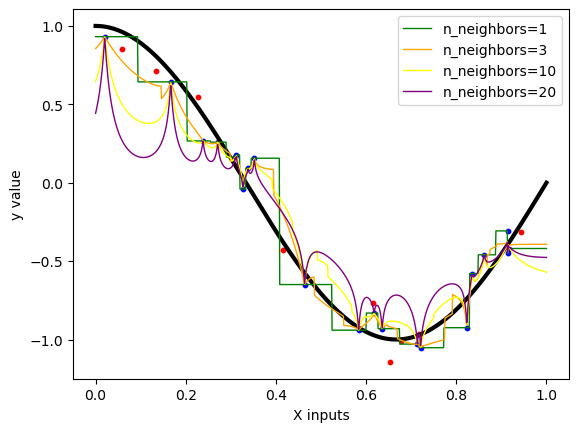

In [5]:
#build another graph using distance as the weight
data_pred_dist=[]
for n in n_neighbors_e:
    # set the hyperparameters
    neigh_mod = KNeighborsRegressor(n_neighbors=n,weights= 'distance')
    # fit the model
    neigh_mod.fit(X_train,y_train)
    y_pred_ls=neigh_mod.predict(x_inputs.reshape(-1,1))
    data_pred_dist.append(y_pred_ls)
    
    
    
plt.scatter(X_train, y_train, c ="blue",s=10, alpha=1)
plt.scatter(X_val, y_val, c ="red",s=10,alpha=1)
plt.xlabel('X inputs')
plt.ylabel('y value')
plt.plot(x_inputs, true_y_ls, color='black',
     linewidth=3, markersize=10)
df_pred=pd.DataFrame(data_pred_dist)


predlist_n1=df_pred.iloc[0]
plt.plot(x_inputs, predlist_n1, color='green',
     linewidth=1, markersize=10, label='n_neighbors=1')
predlist_n3=df_pred.iloc[1]
plt.plot(x_inputs, predlist_n3, color='orange',
     linewidth=1, markersize=10, label='n_neighbors=3')
predlist_n10=df_pred.iloc[2]
plt.plot(x_inputs, predlist_n10, color='yellow',
     linewidth=1, markersize=10, label='n_neighbors=10')
predlist_n20=df_pred.iloc[3]
plt.plot(x_inputs, predlist_n20, color='purple',
     linewidth=1, markersize=10, label='n_neighbors=20')

plt.legend()



**Problem 1b** (5 points)

Nearest neighbor classification. Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the toy classification dataset from the lecture notes (makemoons). 

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook using matplotlib or seaborn (plotly is not accepted).

Explain in a paragraph when KNeighborsClassifier underfits and overfits. You can either make an argument based on the figures you prepared or you can split the dataset to train/val (70-30), train models, calculate the train and validation scores using an evaluation metric of your choice, and plot the scores. 


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

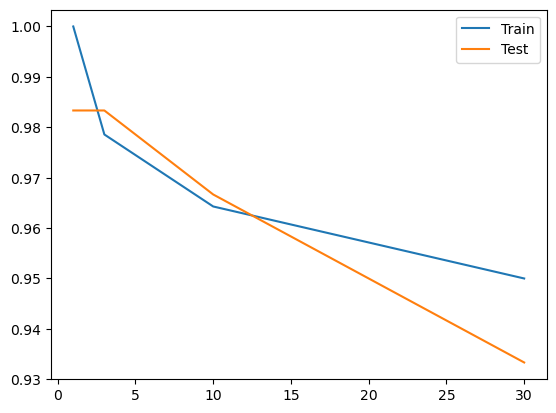

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
neigh_n_class = [1,3,10,30]
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=42)
pred_ls_train=[]
pred_ls_val=[]
ac_score_ls_train=[]
ac_score_ls_val=[]

for n in neigh_n_class:
    neigh_class_mod=KNeighborsClassifier(n_neighbors=n)
    neigh_class_mod.fit(X_train,y_train)
    predictions_train=neigh_class_mod.predict(X_train)
    pred_ls_train.append(predictions_train)
    predictions_val=neigh_class_mod.predict(X_val)
    pred_ls_val.append(predictions_val)
#calculate the accurace score of each list
for ls_pred in pred_ls_val:
    #find accuracy score for all validation/test
    ac_score=accuracy_score(y_val, ls_pred)
    ac_score_ls_val.append(ac_score)
    

#     cm=confusion_matrix(y_val, ls_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.show()
for ls_pred in pred_ls_train:
    #find accuracy score for all trainning
    ac_score_train=accuracy_score(y_train, ls_pred)
    ac_score_ls_train.append(ac_score_train)

#graph accuracy score comparison between train and validation for each model.

  
plt.plot(neigh_n_class, ac_score_ls_train, label = "Train")
plt.plot(neigh_n_class, ac_score_ls_val, label = "Test")
plt.legend()
plt.show()



In [14]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

The higher the n neighbors the more underfitted the model becomes. We see that because both train and test have low accuracy rates. The model is overfitted early on because it has higher training accuracy.

**Problem 2**

You will work with the diabetes dataset and try different ML algorithms on it to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

**Problem 2a** (15 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs. Inside the function, split the data to other and test (80-20) and then use KFold with 4 folds. Then preprocess the data and perform cross validation (I recommend you use GridSearchCV), then calculate the test score. Use RMSE as your evaluation metric. Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric (i.e., `MLpipe_KFold_RMSE`). It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

Add plenty of test and print statements to make sure your code works correctly and it does what you expect it to do. You are encouraged to e.g., print the sets and their shapes before and after preprocessing, print the GridSearchCV results, the test scores.

Test the function with linear regression models that use l1 regularization. Fix any warnings you might encounter. Print out the mean and the standard deviation of the test scores.

In [7]:
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math
import re
from statistics import mean
# read in the data and add your function in this cell
url ='https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
df_dia = pd.read_csv(url, skiprows=0, header=0, sep='\s+')
#rename the columns to something more descriptive
#"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
df_dia=df_dia.rename(columns={'S1':'BS1', 'S2':'BS2', 'S3':'BS3', 'S4':'BS4', 'S5':'BS5', 'S6':'BS6', 'Y':'1yr_prog'})


std_ftrs=['AGE', 'SEX', 'BMI', 'BP', 'BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6']
# The data is already numeric. We just need to standard scale everything.
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs)])

def MLpipe_KFold_RMSE(data, target, preproc, ML_alg, param):
    #split the data using kfold
    random_state =42
    X=data.loc[:, data.columns != '1yr_prog']
    y=data['1yr_prog']
    final_models = []
    test_scores=[0,0,0,0,0,0,0,0,0,0,0]

    random_state_ls=[1,2,3,4,5,6,7,8,9,10]
    for random_state in random_state_ls:
        model_name=str(clf)[:-2].lower()
        print(model_name)
        if param.get(f'{model_name}__random_state'):
            print(param)
            param[f'{model_name}__random_state']=[random_state]
        # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
        print(X_other.shape,y_other.shape)
        print('test set:',X_test.shape,y_test.shape)
        # do KFold split on other
        kf = KFold(n_splits=4,shuffle=True,random_state=random_state)
        #how do i put random states and params into the ML_alg
        pipe = make_pipeline(preprocessor,ML_alg)
        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param, scoring = 'neg_root_mean_squared_error' ,cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        grid.fit(X_other, y_other)
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        # save the model
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[random_state] = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print('test score:',test_scores[random_state])
    model_mean=mean(test_scores)
    model_std=np.std(test_scores)
    print(f'the over all mean of all 10 models is: {model_mean} and the standard deviation is: {model_std}')

In [8]:
# run l1 regularized linear regression to test your function in this cell
from sklearn import linear_model
from  sklearn.linear_model import Lasso
list=np.logspace(1, 10, num=10)
print(f'this is list: {list}')
grid={
    'lasso__alpha': list,
      'lasso__random_state': 1
              } 
clf = linear_model.Lasso()
MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

this is list: [1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]
lasso
{'lasso__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'lasso__random_state': 1}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 56.25776928769419
lasso
{'lasso__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'lasso__random_state': [1]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 57.95923480363295
lasso
{'lasso__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'lasso__random_state': [2]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 57.071622231028115
lasso
{'lasso__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+0

**Problem 2b** (15 points)

Then train following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization 
- linear regression with an elastic net 
- RF
- SVR
- k nearest neighbor regression

Please determine what the parameter grid should be for each of these methods. Follow the guidance we discussed during the lecture.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states whereever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores Write a paragraph or two and describe your findings. 

In [9]:
#find the top 10 models for l2 regularization
grid={
    'ridge__alpha': list,
      'ridge__random_state': 1
              }
clf = linear_model.Ridge()
MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

ridge
{'ridge__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'ridge__random_state': 1}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 55.02012541901422
ridge
{'ridge__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'ridge__random_state': [1]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 55.32994564041654
ridge
{'ridge__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'ridge__random_state': [2]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 56.11993594480588
ridge
{'ridge__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'ridge__random_state': [3]}
(353, 10) (353,

In [10]:
#elastic net
from sklearn.linear_model import ElasticNet
grid={
    'elasticnet__alpha': list,
      'elasticnet__random_state': 1
              }
clf = ElasticNet()

MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

elasticnet
{'elasticnet__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'elasticnet__random_state': 1}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 64.16688256007703
elasticnet
{'elasticnet__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'elasticnet__random_state': [1]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 64.82458576617435
elasticnet
{'elasticnet__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10]), 'elasticnet__random_state': [2]}
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 10 candidates, totalling 40 fits
test score: 65.79062753941696
elasticnet
{'elasticnet__alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09

In [11]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
lin_list=np.linspace(10,100,10)
print(lin_list)
grid={
    'randomforestregressor__max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
    'randomforestregressor__max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
}

clf=RandomForestRegressor()
MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 58.091094037745044
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 58.174815936049846
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 58.320886820932465
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 57.68737467270645
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 55.30550310716937
randomforestregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 20 candidates, totalling 80 fits
test score: 59.67166154277746
randomforestreg

In [12]:
#svr
grid={'svr__C': np.linspace(1,5,10),
    'svr__gamma': np.linspace(1,5,10) }
clf=SVR()
MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 72.21787419321107
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 76.47320361978555
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 72.75690407405423
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 74.68830064755856
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 80.58780151206327
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 77.52499846857262
svr
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 100 candidates, totalling 400 fits
test score: 69.87733600283819
svr
(353, 10) (353,)
test s

In [13]:
#knn
from sklearn.neighbors import KNeighborsRegressor
clf= KNeighborsRegressor()

grid={
    'kneighborsregressor__n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'kneighborsregressor__weights': ['uniform','distance']
    
}

MLpipe_KFold_RMSE(df_dia, '1yr_prog', preprocessor, clf, grid)

kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 57.59300748176355
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 57.74840160398665
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 59.945854147079956
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 55.28038955198642
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 55.49192765831426
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 folds for each of 36 candidates, totalling 144 fits
test score: 61.241078167786526
kneighborsregressor
(353, 10) (353,)
test set: (89, 10) (89,)
Fitting 4 fo

The Ridge model had the lowest over all mean of 48.86304689621769 and the standard deviation is: 15.622190657730158.